In [1]:
import pandas as pd
import numpy as np
import spacy
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from rake_nltk import Rake
import matplotlib.pyplot as plt
import re
import string

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Initialize VADER and RAKE
analyzer = SentimentIntensityAnalyzer()
rake = Rake()

In [2]:
def clean_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()
    return text

In [3]:
def perform_ner(texts):
    all_entities = []
    for text in texts:
        doc = nlp(text)
        entities = [(ent.text, ent.label_) for ent in doc.ents]
        all_entities.extend(entities)
    return all_entities

In [4]:
def get_pos_tags(texts):
    all_tags = []
    for text in texts:
        tokens = word_tokenize(text)
        tags = pos_tag(tokens)
        all_tags.extend(tags)
    return all_tags

In [5]:
def top_nouns_verbs_adjectives(tags, top_n=10):
    nouns = [word for word, pos in tags if pos in ['NN', 'NNS', 'NNP', 'NNPS']]
    verbs = [word for word, pos in tags if pos.startswith('VB')]
    adjectives = [word for word, pos in tags if pos in ['JJ', 'JJR', 'JJS']]
    
    return {
        'nouns': nltk.FreqDist(nouns).most_common(top_n),
        'verbs': nltk.FreqDist(verbs).most_common(top_n),
        'adjectives': nltk.FreqDist(adjectives).most_common(top_n)
    }


In [6]:
def detect_emotions(texts):
    all_scores = []
    for text in texts:
        sentiment = analyzer.polarity_scores(text)
        all_scores.append(sentiment['compound'])
    return all_scores

In [7]:
# Can update this functionality to generate keywords based on specific topics or related word meanings

def extract_keywords(texts):
    all_keywords = []
    for text in texts:
        rake.extract_keywords_from_text(text)
        keywords = rake.get_ranked_phrases()
        all_keywords.extend(keywords)
    return all_keywords

In [8]:
def analyze_sentiment_scores(scores):
    mean_score = np.mean(scores)
    return mean_score

In [9]:
def plot_sentiment_distribution(scores):
    plt.figure(figsize=(10, 6))
    plt.hist(scores, bins=20, edgecolor='black')
    plt.title('Sentiment Score Distribution')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [10]:
def average_word_count(texts):
    word_counts = [len(text.split()) for text in texts]
    return np.mean(word_counts)

Average Sentiment Score: 0.5701975609756098
Average Word Count per Review: 52.46341463414634

NER:
{('each night', 'TIME'), ('100', 'CARDINAL'), ('about a month', 'DATE'), ('first', 'ORDINAL'), ('daily', 'DATE'), ('first few days', 'DATE'), ('every few days', 'DATE'), ('the 30 minutes', 'TIME'), ('the first day', 'DATE'), ('10', 'CARDINAL'), ('every morning', 'TIME'), ('1798', 'DATE'), ('day 2', 'DATE'), ('4 hours', 'TIME'), ('4 days', 'DATE'), ('a few weeks', 'DATE'), ('pas de fini', 'PERSON'), ('korean', 'NORP'), ('2', 'CARDINAL'), ('25', 'DATE'), ('one', 'CARDINAL'), ('second', 'ORDINAL'), ('3rd', 'ORDINAL'), ('12', 'CARDINAL'), ('zero', 'CARDINAL'), ('a month', 'DATE')}

Top POS Tags:
Nouns:
[('i', 66), ('skin', 41), ('’', 19), ('t', 17), ('product', 15), ('essence', 13), ('texture', 11), ('ve', 9), ('toner', 8), ('m', 8)]
Verbs:
[('’', 34), ('is', 31), ('has', 18), ('using', 16), ('have', 15), ('i', 14), ('use', 13), ('was', 10), ('been', 9), ('love', 8)]
Adj:
[('i', 21), ('skin',

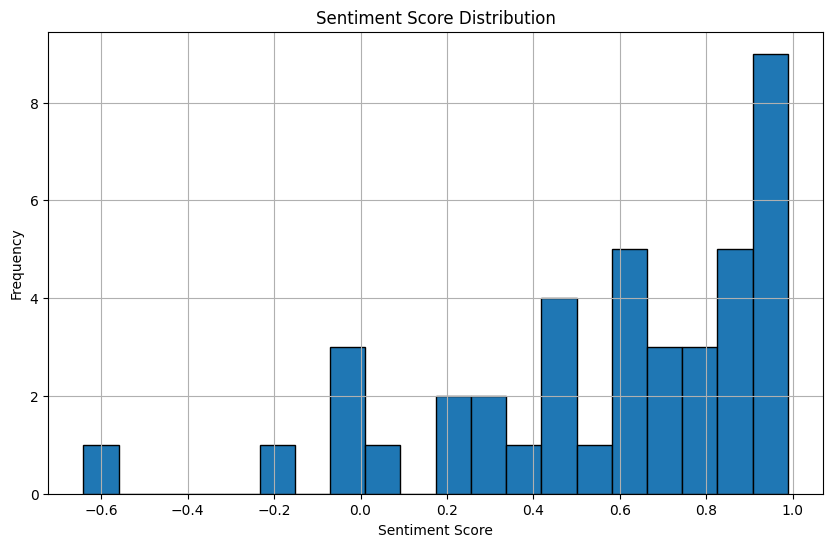

In [12]:
def import_and_process_data(file_path):
    df = pd.read_excel(file_path, header=None, names=['review'])
    reviews = df['review'].tolist()
    
    # Clean the entire list of reviews
    cleaned_reviews = [clean_text(review) for review in reviews]
    
    # NER
    entities = perform_ner(cleaned_reviews)
    
    # POS Tagging
    pos_tags = get_pos_tags(cleaned_reviews)
    top_pos_tags = top_nouns_verbs_adjectives(pos_tags)
    
    # Emotion Detection
    sentiment_scores = detect_emotions(cleaned_reviews)
    
    # Keyword Extraction
    keywords = extract_keywords(cleaned_reviews)
    
    # Compute statistics
    avg_sentiment_score = analyze_sentiment_scores(sentiment_scores)
    avg_word_count = average_word_count(reviews)
    print(f"Average Sentiment Score: {avg_sentiment_score}")
    print(f"Average Word Count per Review: {avg_word_count}")
    
    # NER
    print("\nNER:")
    print(set(entities))  # Print unique entities

    # POS
    print("\nTop POS Tags:")
    print('Nouns:')
    print(top_pos_tags['nouns'])
    print('Verbs:')
    print(top_pos_tags['verbs'])
    print('Adj:')
    print(top_pos_tags['adjectives'])

    # Keyword extraction
    print("\nKeywords Extracted:")
    print(set(keywords))  # Print unique keywords
    
    # Plot sentiment distribution
    plot_sentiment_distribution(sentiment_scores)

# Define the file path
file_path = 'sentiment_data/73.xlsx'

import_and_process_data(file_path)